# Analyzing IMDB Data in Keras

In [1]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 1. Loading the data
This dataset comes preloaded with Keras, so one simple command will get us training and testing data. There is a parameter for how many words we want to look at. We've set it at 1000, but feel free to experiment.

In [2]:
# Loading the data (it's preloaded in Keras)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


## 2. Examining the data
Notice that the data has been already pre-processed, where all the words have numbers, and the reviews come in as a vector with the words that the review contains. For example, if the word 'the' is the first one in our dictionary, and a review contains the word 'the', then there is a 1 in the corresponding vector.

The output comes as a vector of 1's and 0's, where 1 is a positive sentiment for the review, and 0 is negative.

In [3]:
def index_to_word(index_of_word):
    INDEX_FROM=3   # word index offset
    word_to_id = keras.datasets.imdb.get_word_index()
    word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
    word_to_id["<PAD>"] = 0 # https://github.com/nicolas-ivanov/tf_seq2seq_chatbot/issues/15
    word_to_id["<START>"] = 1
    word_to_id["<UNK>"] = 2 # UNK means unknown word, a word that doesn't exist the the vocabulary set
    id_to_word = {value:key for key,value in word_to_id.items()}
    print(' '.join(id_to_word[id] for id in index_of_word ))

print(x_train[0])
print("-"*100)
index_to_word(x_train[0])
print("="*100)
print("\nThis is a positive sentiment - data label:" + str(y_train[0]))


[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
----------------------------------------------------------------------------------------------------
<START> this film was just b

## 3. One-hot encoding the output
Here, we'll turn the input vectors into (0,1)-vectors. For example, if the pre-processed vector contains the number 14, then in the processed vector, the 14th entry will be 1.

Sai: Each row has 1000 words(slots), if current record has word index 14, then the 14 index of this row will return 1.

In [4]:
# One-hot encoding the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print(x_train[0])

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

And we'll also one-hot encode the output.

In [5]:
# One-hot encoding the output
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(25000, 2)
(25000, 2)


## 4. Building the  model architecture
Build a model here using sequential. Feel free to experiment with different layers and sizes! Also, experiment adding dropout to reduce overfitting.

In [6]:
# TODO: Build the model architecture
model = Sequential()

# Layer 1
model.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
model.add(Dropout(.2))
# Layer 2
model.add(Dense(2))
# model.add(Activation('relu'))
# model.add(Dropout(.01))

# Output Layer
model.add(Activation('sigmoid'))

# TODO: Compile the model using a loss function and an optimizer.
model.compile(metrics=['accuracy'],
              loss = 'categorical_crossentropy', 
              optimizer='rmsprop')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               128128    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 128,386
Trainable params: 128,386
Non-trainable params: 0
_________________________________________________________________


## 5. Training the model
Run the model here. Experiment with different batch_size, and number of epochs!

In [7]:
# TODO: Run the model. Feel free to experiment with different batch sizes and number of epochs.
epochss= [1, 4, 8, 12]
train_scores = []
test_scores = []
for epocs in epochss:
    print("Using Epoch of size : ", epocs)
    
    model.fit(x_train, y_train, epochs=epocs, verbose=0,batch_size=100 )
    train_score = model.evaluate(x_train,y_train)
    train_scores.append(1-train_score[1])
    print("Training Accuracy:", train_score[1])
    
    test_score = model.evaluate(x_test,y_test)
    test_scores.append(1-test_score[1])
    print("Test Accuracy:", test_score[1])
    print("-"*100)

Using Epoch of size :  1
25000/25000 [==============================] - 1s 34us/step
Training Accuracy: 0.88028
25000/25000 [==============================] - 1s 38us/step
Test Accuracy: 0.86096
----------------------------------------------------------------------------------------------------
Using Epoch of size :  4
25000/25000 [==============================] - 1s 47us/step
Training Accuracy: 0.94276
25000/25000 [==============================] - 1s 50us/step
Test Accuracy: 0.8578
----------------------------------------------------------------------------------------------------
Using Epoch of size :  8
25000/25000 [==============================] - 1s 36us/step
Training Accuracy: 0.99808
25000/25000 [==============================] - 1s 40us/step
Test Accuracy: 0.85216
----------------------------------------------------------------------------------------------------
Using Epoch of size :  12
25000/25000 [==============================] - 1s 40us/step
Training Accuracy: 0.9996
2

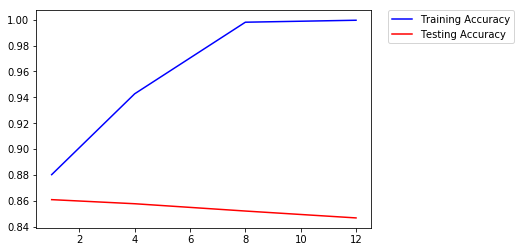

Training score: [0.88028, 0.94276, 0.99808, 0.9996]
Testing score: [0.86096, 0.8578, 0.85216, 0.84684]


In [8]:
import matplotlib.pyplot as plt 

train_scores = [1-x for x in train_scores]
test_scores = [1-x for x in test_scores]
traing_line = plt.plot(epochss,train_scores,  color='b', label='Training Accuracy')
testing_line = plt.plot(epochss,test_scores, color='r', label='Testing Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

print("Training score: "+ str(train_scores))
print("Testing score: "+ str(test_scores))

## 6. Evaluating the model
This will give you the accuracy of the model, as evaluated on the testing set. Can you get something over 85%?

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: ", score[1])

Accuracy:  0.84684


In [10]:
import datetime
print("Last run on "+datetime.datetime.now().strftime("%d-%b-%Y %H:%M"))

Last run on 03-May-2019 16:40
